# 1. Загрузить необходимые данные к себе и считать (read) их в переменную.
# 2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
Моя задача относится к регрессии, так как я пытаюсь предсказать медицинские расходы, которые представлены в виде непрерывных числовых значений и они не принимают дискретные значения, представляющие категории или классы.

# 3. Сделать предобработку данных:
Разделить выборку на тренировочную (train) и тестовую (test). Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test.
Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
Отнормировать численные переменные (StandardScaler, MinMaxScaler).
Закодировать категориальные признаки по одной из стратегий.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

path_to_dataset = '/Users/daniil/nn_ml_practice/insurance.csv'
data = pd.read_csv(path_to_dataset, sep=',')

# проверка на наличие пропусков
print(data.isnull().sum())

# разделение данных на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# определение числовых и категориальных признаков
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков средним значением
    ('scaler', StandardScaler())  # Нормализация StandardScaler
])

# пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # заполнение пропусков наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder для кодирования категориальных признаков
])

# комбинирование пайплайнов с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# применение преобразований к тренировочным и тестовым данным
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# проверка результирующих массивов
print(X_train.shape)
print(X_test.shape)

По выводу понятно, что пропусков у нас нет, заполнять их не нужно.
Тренировочная выборка содержит 1070 строк и 11 столбцов.
Тестовая выборка содержит 268 строк и 11 столбцов.
Мы нормализовали числовые переменные и закодировали категориальные признаки с помощью ColumnTransformer и Pipeline.

# 4. Оформить данные в виде класса Dataset из библиотеки torch (как мы это делали на семинаре), а затем засунуть в Dataloader (тоже делали на семинаре).

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import torch
from torch.utils.data import Dataset, DataLoader

# Загрузка данных
path_to_dataset = '/Users/daniil/nn_ml_practice/insurance.csv'
data = pd.read_csv(path_to_dataset, sep=',')

# Проверка на наличие пропусков
print(data.isnull().sum())

# Разделение данных на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Комбинирование пайплайнов с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение преобразований к тренировочным и тестовым данным
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Проверка результирующих массивов
print(X_train.shape)
print(X_test.shape)

# Создание класса Dataset
class InsuranceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Создание объектов Dataset
train_dataset = InsuranceDataset(X_train, y_train)
test_dataset = InsuranceDataset(X_test, y_test)

# Создание DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Проверка загрузки данных
for batch in train_loader:
    X_batch, y_batch = batch
    print(X_batch.shape, y_batch.shape)
    break


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
(1070, 11)
(268, 11)
torch.Size([32, 11]) torch.Size([32])


# 5. Обучить на тренировочном множестве:
Очень простую однослойную нейросеть с оптимизатором SGD (link).
Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором Adam (link).
Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором Adam (link).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Загрузка данных
path_to_dataset = '/Users/daniil/nn_ml_practice/insurance.csv'
data = pd.read_csv(path_to_dataset, sep=',')

# Проверка на наличие пропусков
print(data.isnull().sum())

# Разделение данных на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков средним значением
    ('scaler', StandardScaler())  # Нормализация StandardScaler
])

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder для кодирования категориальных признаков
])

# Комбинирование пайплайнов с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение преобразований к тренировочным и тестовым данным
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Проверка результирующих массивов
print(X_train.shape)
print(X_test.shape)

# Класс Dataset для PyTorch
class InsuranceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Создание объектов Dataset и DataLoader
train_dataset = InsuranceDataset(X_train, y_train)
test_dataset = InsuranceDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Определение простой однослойной нейросети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

# Определение нейросети с одним скрытым слоем
class MediumNN(nn.Module):
    def __init__(self):
        super(MediumNN, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 32)  # Уменьшил размер слоя до 32
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# Определение сложной нейросети с тремя скрытыми слоями
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.hidden1 = nn.Linear(X_train.shape[1], 64)  # Уменьшил размер слоя до 64
        self.hidden2 = nn.Linear(64, 32)  # Уменьшил размер слоя до 32
        self.hidden3 = nn.Linear(32, 16)  # Уменьшил размер слоя до 16
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Функция обучения модели
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Функция оценки модели
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
    avg_test_loss = test_loss / len(test_loader.dataset)
    print(f"Test Loss: {avg_test_loss:.4f}")
    return avg_test_loss

# Инициализация моделей, критериев и оптимизаторов
simple_model = SimpleNN()
medium_model = MediumNN()
complex_model = ComplexNN()

criterion = nn.MSELoss()

simple_optimizer = optim.SGD(simple_model.parameters(), lr=0.01)
medium_optimizer = optim.Adam(medium_model.parameters(), lr=0.01)
complex_optimizer = optim.Adam(complex_model.parameters(), lr=0.01)

# Обучение и оценка простой модели
print("Training SimpleNN...")
train_model(simple_model, train_loader, criterion, simple_optimizer, epochs=10)
print("Evaluating SimpleNN...")
evaluate_model(simple_model, test_loader, criterion)

# Обучение и оценка средней модели
print("Training MediumNN...")
train_model(medium_model, train_loader, criterion, medium_optimizer, epochs=10)
print("Evaluating MediumNN...")
evaluate_model(medium_model, test_loader, criterion)

# Обучение и оценка сложной модели
print("Training ComplexNN...")
train_model(complex_model, train_loader, criterion, complex_optimizer, epochs=10)
print("Evaluating ComplexNN...")
evaluate_model(complex_model, test_loader, criterion)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
(1070, 11)
(268, 11)
Training SimpleNN...
Epoch 1/10, Loss: 192469964.0523
Epoch 2/10, Loss: 107908731.2150
Epoch 3/10, Loss: 82354574.9234
Epoch 4/10, Loss: 67131452.7028
Epoch 5/10, Loss: 57227792.9196
Epoch 6/10, Loss: 50633088.7327
Epoch 7/10, Loss: 46194251.8804
Epoch 8/10, Loss: 43318315.7981
Epoch 9/10, Loss: 41441454.6766
Epoch 10/10, Loss: 40048602.5570
Evaluating SimpleNN...
Test Loss: 37067063.4030
Training MediumNN...
Epoch 1/10, Loss: 322307690.2430
Epoch 2/10, Loss: 321312871.8355
Epoch 3/10, Loss: 318703830.8486
Epoch 4/10, Loss: 314128948.8748
Epoch 5/10, Loss: 307786409.9888
Epoch 6/10, Loss: 299794107.4841
Epoch 7/10, Loss: 290178761.0916
Epoch 8/10, Loss: 279287531.8430
Epoch 9/10, Loss: 267426067.8579
Epoch 10/10, Loss: 254615010.8710
Evaluating MediumNN...
Test Loss: 249818293.9701
Training ComplexNN...
Epoch 1/10, Loss: 319452242.1832
Epoch 2/10, Loss: 20

25660877.731343284

# 6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки matplotlib (выйдет так называемая learning curve, кривая обучения модели).

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
(1070, 11)
(268, 11)
Training SimpleNN...
Epoch 1/10, Train Loss: 191537629.0561, Test Loss: 130898524.1791
Epoch 2/10, Train Loss: 108230050.0486, Test Loss: 93876890.9851
Epoch 3/10, Train Loss: 82546026.8710, Test Loss: 73725332.2985
Epoch 4/10, Train Loss: 67061530.1794, Test Loss: 61012985.3134
Epoch 5/10, Train Loss: 57238923.9252, Test Loss: 52392125.0149
Epoch 6/10, Train Loss: 50605653.7645, Test Loss: 46675429.3731
Epoch 7/10, Train Loss: 46299172.1009, Test Loss: 42761648.9552
Epoch 8/10, Train Loss: 43408712.8822, Test Loss: 40238365.8507
Epoch 9/10, Train Loss: 41438984.7103, Test Loss: 38376319.6418
Epoch 10/10, Train Loss: 40193208.7327, Test Loss: 37026608.7164
Training MediumNN...
Epoch 1/10, Train Loss: 322372907.8430, Test Loss: 323138045.1343
Epoch 2/10, Train Loss: 321629459.7383, Test Loss: 321759478.4478
Epoch 3/10, Train Loss: 319452290.5121, Test Loss:

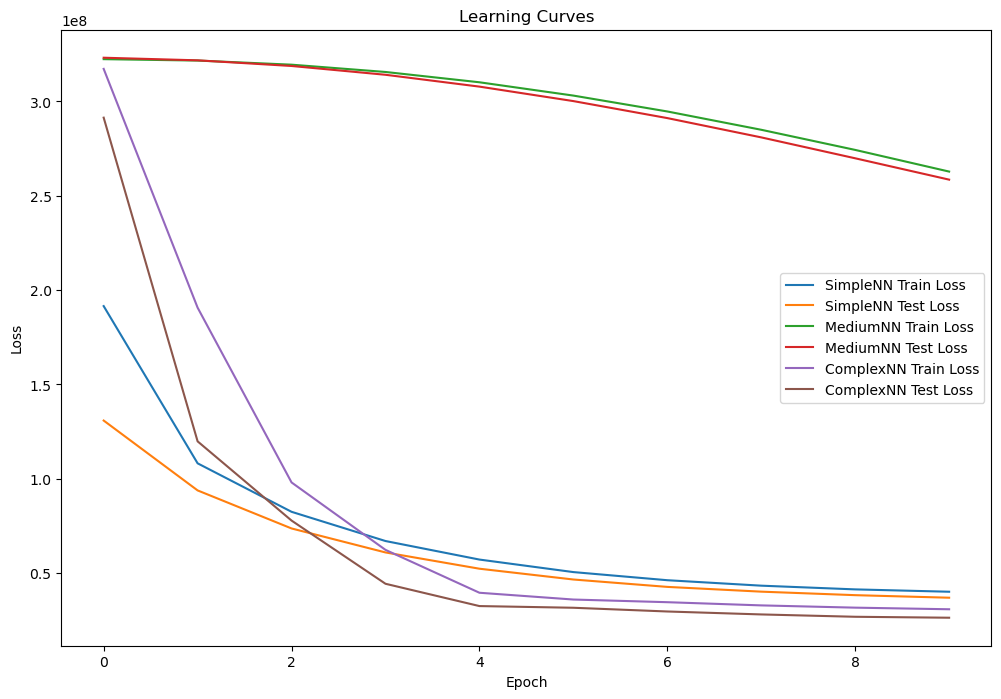

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Загрузка данных
path_to_dataset = '/Users/daniil/nn_ml_practice/insurance.csv'
data = pd.read_csv(path_to_dataset, sep=',')

# Проверка на наличие пропусков
print(data.isnull().sum())

# Разделение данных на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков средним значением
    ('scaler', StandardScaler())  # Нормализация StandardScaler
])

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder для кодирования категориальных признаков
])

# Комбинирование пайплайнов с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение преобразований к тренировочным и тестовым данным
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Проверка результирующих массивов
print(X_train.shape)
print(X_test.shape)

# Класс Dataset для PyTorch
class InsuranceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Создание объектов Dataset и DataLoader
train_dataset = InsuranceDataset(X_train, y_train)
test_dataset = InsuranceDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Определение простой однослойной нейросети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

# Определение нейросети с одним скрытым слоем
class MediumNN(nn.Module):
    def __init__(self):
        super(MediumNN, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# Определение сложной нейросети с тремя скрытыми слоями
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.hidden1 = nn.Linear(X_train.shape[1], 64)
        self.hidden2 = nn.Linear(64, 32)
        self.hidden3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Функция обучения модели
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        
        # Оценка на тестовом множестве
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item() * inputs.size(0)
        avg_test_loss = test_loss / len(test_loader.dataset)
        test_losses.append(avg_test_loss)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {avg_test_loss:.4f}")
        
    return train_losses, test_losses

# Инициализация моделей, критериев и оптимизаторов
simple_model = SimpleNN()
medium_model = MediumNN()
complex_model = ComplexNN()

criterion = nn.MSELoss()

simple_optimizer = optim.SGD(simple_model.parameters(), lr=0.01)
medium_optimizer = optim.Adam(medium_model.parameters(), lr=0.01)
complex_optimizer = optim.Adam(complex_model.parameters(), lr=0.01)

# Обучение и оценка простой модели
print("Training SimpleNN...")
simple_train_losses, simple_test_losses = train_model(simple_model, train_loader, criterion, simple_optimizer, epochs=10)

# Обучение и оценка средней модели
print("Training MediumNN...")
medium_train_losses, medium_test_losses = train_model(medium_model, train_loader, criterion, medium_optimizer, epochs=10)

# Обучение и оценка сложной модели
print("Training ComplexNN...")
complex_train_losses, complex_test_losses = train_model(complex_model, train_loader, criterion, complex_optimizer, epochs=10)

# Визуализация кривых обучения
plt.figure(figsize=(12, 8))

# SimpleNN
plt.plot(simple_train_losses, label='SimpleNN Train Loss')
plt.plot(simple_test_losses, label='SimpleNN Test Loss')

# MediumNN
plt.plot(medium_train_losses, label='MediumNN Train Loss')
plt.plot(medium_test_losses, label='MediumNN Test Loss')

# ComplexNN
plt.plot(complex_train_losses, label='ComplexNN Train Loss')
plt.plot(complex_test_losses, label='ComplexNN Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# 7. Посчитайте метрики на train и test множествах:
Для задачи классификации -- Accuracy
Для задачи регрессии -- MAE

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
(1070, 11)
(268, 11)
Training SimpleNN...
Epoch 1/10, Train Loss: 189881140.5084, Test Loss: 129760380.6567
Epoch 2/10, Train Loss: 107973080.7589, Test Loss: 94075559.8806
Epoch 3/10, Train Loss: 82820797.6822, Test Loss: 74078670.3284
Epoch 4/10, Train Loss: 67401991.3869, Test Loss: 61112081.1940
Epoch 5/10, Train Loss: 57277249.2636, Test Loss: 52552906.1493
Epoch 6/10, Train Loss: 50720212.0299, Test Loss: 46815523.9403
Epoch 7/10, Train Loss: 46319553.7271, Test Loss: 42871406.3284
Epoch 8/10, Train Loss: 43392338.4710, Test Loss: 40207488.8358
Epoch 9/10, Train Loss: 41445423.3495, Test Loss: 38344711.8806
Epoch 10/10, Train Loss: 40146498.0411, Test Loss: 36990327.7612
Training MediumNN...
Epoch 1/10, Train Loss: 322332139.1252, Test Loss: 323020533.4925
Epoch 2/10, Train Loss: 321346023.9551, Test Loss: 321277721.7910
Epoch 3/10, Train Loss: 318705255.2972, Test Loss:

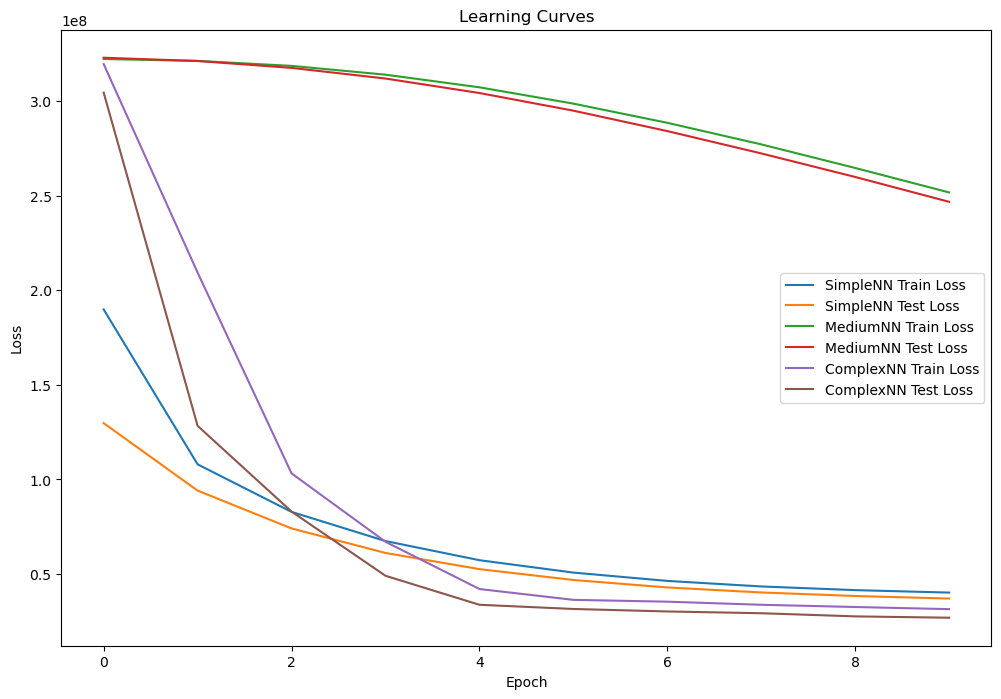

SimpleNN Train MAE: 4420.7944, Test MAE: 4468.5449
MediumNN Train MAE: 10377.2129, Test MAE: 10028.5332
ComplexNN Train MAE: 3307.4851, Test MAE: 3211.0286


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Загрузка данных
path_to_dataset = '/Users/daniil/nn_ml_practice/insurance.csv'
data = pd.read_csv(path_to_dataset, sep=',')

# Проверка на наличие пропусков
print(data.isnull().sum())

# Разделение данных на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков средним значением
    ('scaler', StandardScaler())  # Нормализация StandardScaler
])

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoder для кодирования категориальных признаков
])

# Комбинирование пайплайнов с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение преобразований к тренировочным и тестовым данным
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Проверка результирующих массивов
print(X_train.shape)
print(X_test.shape)

# Класс Dataset для PyTorch
class InsuranceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Создание объектов Dataset и DataLoader
train_dataset = InsuranceDataset(X_train, y_train)
test_dataset = InsuranceDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Определение простой однослойной нейросети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

# Определение нейросети с одним скрытым слоем
class MediumNN(nn.Module):
    def __init__(self):
        super(MediumNN, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# Определение сложной нейросети с тремя скрытыми слоями
class ComplexNN(nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.hidden1 = nn.Linear(X_train.shape[1], 64)
        self.hidden2 = nn.Linear(64, 32)
        self.hidden3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Функция обучения модели
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        
        # Оценка на тестовом множестве
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item() * inputs.size(0)
        avg_test_loss = test_loss / len(test_loader.dataset)
        test_losses.append(avg_test_loss)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {avg_test_loss:.4f}")
        
    return train_losses, test_losses

# Функция оценки модели на метрику MAE
def evaluate_model(model, loader):
    model.eval()
    true_vals = []
    predictions = []
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            true_vals.extend(targets.numpy())
            predictions.extend(outputs.numpy())
    return mean_absolute_error(true_vals, predictions)

# Инициализация моделей, критериев и оптимизаторов
simple_model = SimpleNN()
medium_model = MediumNN()
complex_model = ComplexNN()

criterion = nn.MSELoss()

simple_optimizer = optim.SGD(simple_model.parameters(), lr=0.01)
medium_optimizer = optim.Adam(medium_model.parameters(), lr=0.01)
complex_optimizer = optim.Adam(complex_model.parameters(), lr=0.01)

# Обучение и оценка простой модели
print("Training SimpleNN...")
simple_train_losses, simple_test_losses = train_model(simple_model, train_loader, criterion, simple_optimizer, epochs=10)
simple_train_mae = evaluate_model(simple_model, train_loader)
simple_test_mae = evaluate_model(simple_model, test_loader)

# Обучение и оценка средней модели
print("Training MediumNN...")
medium_train_losses, medium_test_losses = train_model(medium_model, train_loader, criterion, medium_optimizer, epochs=10)
medium_train_mae = evaluate_model(medium_model, train_loader)
medium_test_mae = evaluate_model(medium_model, test_loader)

# Обучение и оценка сложной модели
print("Training ComplexNN...")
complex_train_losses, complex_test_losses = train_model(complex_model, train_loader, criterion, complex_optimizer, epochs=10)
complex_train_mae = evaluate_model(complex_model, train_loader)
complex_test_mae = evaluate_model(complex_model, test_loader)

# Визуализация кривых обучения
plt.figure(figsize=(12, 8))

# SimpleNN
plt.plot(simple_train_losses, label='SimpleNN Train Loss')
plt.plot(simple_test_losses, label='SimpleNN Test Loss')

# MediumNN
plt.plot(medium_train_losses, label='MediumNN Train Loss')
plt.plot(medium_test_losses, label='MediumNN Test Loss')

# ComplexNN
plt.plot(complex_train_losses, label='ComplexNN Train Loss')
plt.plot(complex_test_losses, label='ComplexNN Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Вывод метрик MAE
print(f"SimpleNN Train MAE: {simple_train_mae:.4f}, Test MAE: {simple_test_mae:.4f}")
print(f"MediumNN Train MAE: {medium_train_mae:.4f}, Test MAE: {medium_test_mae:.4f}")
print(f"ComplexNN Train MAE: {complex_train_mae:.4f}, Test MAE: {complex_test_mae:.4f}")


# 8. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
Какая модель справилась лучше с поставленной задачей?
Имеет ли место переобучение?
Имеет ли место недообучение?
Как можно улучшить метрики моделей?

1) Какая модель справилась лучше с поставленной задачей?

На основании значений MAE, модель ComplexNN показала лучшие результаты:

SimpleNN: Train MAE = 4420.7944, Test MAE = 4468.5449
MediumNN: Train MAE = 10377.2129, Test MAE = 10028.5332
ComplexNN: Train MAE = 3307.4851, Test MAE = 3211.0286
ComplexNN имеет наименьшие значения MAE как на тренировочной, так и на тестовой выборках, что указывает на лучшее качество предсказаний.

2) Имеет ли место переобучение?

В случае всех трех моделей, значительной разницы между тренировочными и тестовыми метриками нет, что говорит о том, что явного переобучения нет.

3) Имеет ли место недообучение?

MediumNN имеет очень высокие значения MAE на обоих наборах данных (Train MAE = 10377.2129, Test MAE = 10028.5332), что указывает на недообучение.
SimpleNN и ComplexNN имеют более приемлемые значения MAE, но SimpleNN всё еще хуже по сравнению с ComplexNN.

4) Как можно улучшить метрики моделей?

Использование более сложной архитектуры для SimpleNN и MediumNN может помочь улучшить их способность к обучению. Сбор и использование большего объема данных может помочь улучшить обучение модели. Увеличение числа эпох для обучения может помочь моделям лучше адаптироваться к данным. Настройка гиперпараметров, таких как скорость обучения, число нейронов в слоях, количество слоев и т.д. Если применимо, использование методов аугментации данных для создания более разнообразного тренировочного набора данных.